# Movie Recommender System

## About the Dataset:

 Content:This dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

File -movies.csv<br>
Columns:<br>
 - movie id
 - title
 - genre

File-ratings.csv<br>
Columns:
  - user id
  - movie id
  - rating
  - timestamp

File-tags.csv<br>
Columns:
  - user id
  - movie id
  - tags
  - timestamp
        
File-links.csv<br>        
Columns:
   - movieId
   - imdbId
   - tmdbId

#### In this project we are going to use the dataset from MovieLens, a movie recommendation service.
 
#### It is a Recommendation System.

## Importing the Libraries

In [1]:
# Importing the required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#import ast 
import os
#from scipy import stats
#plt.style.use('seaborn-bright')
%matplotlib inline 
#from ast import literal_eval
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
#from surprise import Reader, Dataset, SVD
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install surprise

     |████████████████████████████████| 11.8MB 340kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670958 sha256=7c196c523cf79e5a0f7ae0e6b18f61771c4f44bc36b649f4623dbf960360eb4d
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
from surprise import Reader, Dataset, SVD


### TO CHECK THE VERSION OF THE PACKAGES IMPORTED

In [4]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.5
1.18.5
0.10.1


## Reading the DataSet

In [5]:
!ls "drive/My Drive/project "


 links.csv				 movies.csv    tags.csv
 ml-latest-small.zip			 ratings.csv
'ml-latest-small.zip (Unzipped Files)'	 README.txt


In [6]:
#Reading the movie data
movie_names=pd.read_csv("drive/My Drive/project /movies.csv")
movie_names.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
#Reading the ratings data
ratings_data=pd.read_csv("drive/My Drive/project /ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
#Reading the tags file
tags_data=pd.read_csv("drive/My Drive/project /tags.csv")
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
#Reading the links file
links_data=pd.read_csv("drive/My Drive/project /links.csv")
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Missing Values

In [10]:
##Checking for the null or missing values in data
movie_names.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
##Checking for the null or missing values in data
ratings_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
####Checking for the null or missing values in data
links_data.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

### tmdbId has 8 null values,they either can be discarded or filled with suitable values,but since they are the id columns we are not supposed to fill them.

In [13]:
#links_data["tmdbId"].fillna(links_data['tmdbId'].mean(),inplace=True)

In [14]:
#links_data.isnull().sum()

In [15]:
# Removing Unnecessary or irrelevant columns
ratings_data=ratings_data.drop("timestamp",axis=1)
ratings_data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [16]:
# Removing Unnecessary or irrelevant columns
tags_data=tags_data.drop("timestamp",axis=1)
tags_data.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


## Statistical Analysis

In [17]:
movie_names.describe(include="all")

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


In [18]:
ratings_data.describe(include="all")

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [19]:
tags_data.describe(include="all")

,userId,movieId,tag
count,3683.000000,3683.000000,3683
unique,NaN,NaN,1589
top,NaN,NaN,In Netflix queue
freq,NaN,NaN,131
mean,431.149335,27252.013576,NaN
std,158.472553,43490.558803,NaN
min,2.000000,1.000000,NaN
25%,424.000000,1262.500000,NaN
50%,474.000000,4454.000000,NaN
75%,477.000000,39263.000000,NaN


In [20]:
links_data.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [21]:
movie_names.shape

(9742, 3)

- There are 9742 rows and 3 columns

In [22]:
ratings_data.shape

(100836, 3)

- There are 100836 rows and 3 columns

In [23]:
tags_data.shape

(3683, 3)

- There are 3683 rows and 3 columns

In [24]:
links_data.shape

(9742, 3)

- There are 9742 rows and 3 columns


## Data Visualization


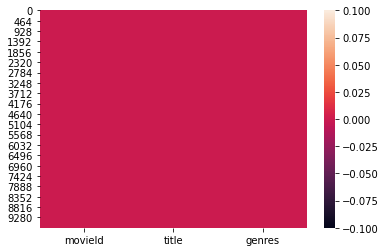

In [25]:
#Visualizing the missing values with heatmap
sns.heatmap(movie_names.isna())

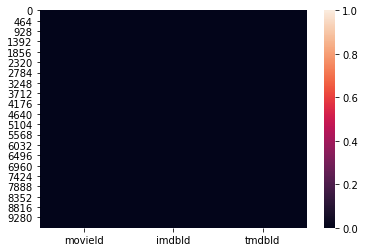

In [26]:
#Visualizing the missing values with heatmap
sns.heatmap(links_data.isna())

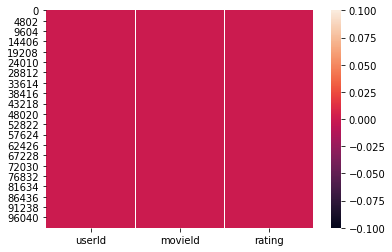

In [27]:
#Visualizing the missing values with heatmap
sns.heatmap(ratings_data.isna())

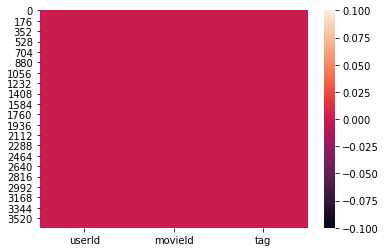

In [28]:
#Visualizing the missing values with heatmap
sns.heatmap(tags_data.isna())

### missingno---> It is specially used for checking(visualizing) the missing values

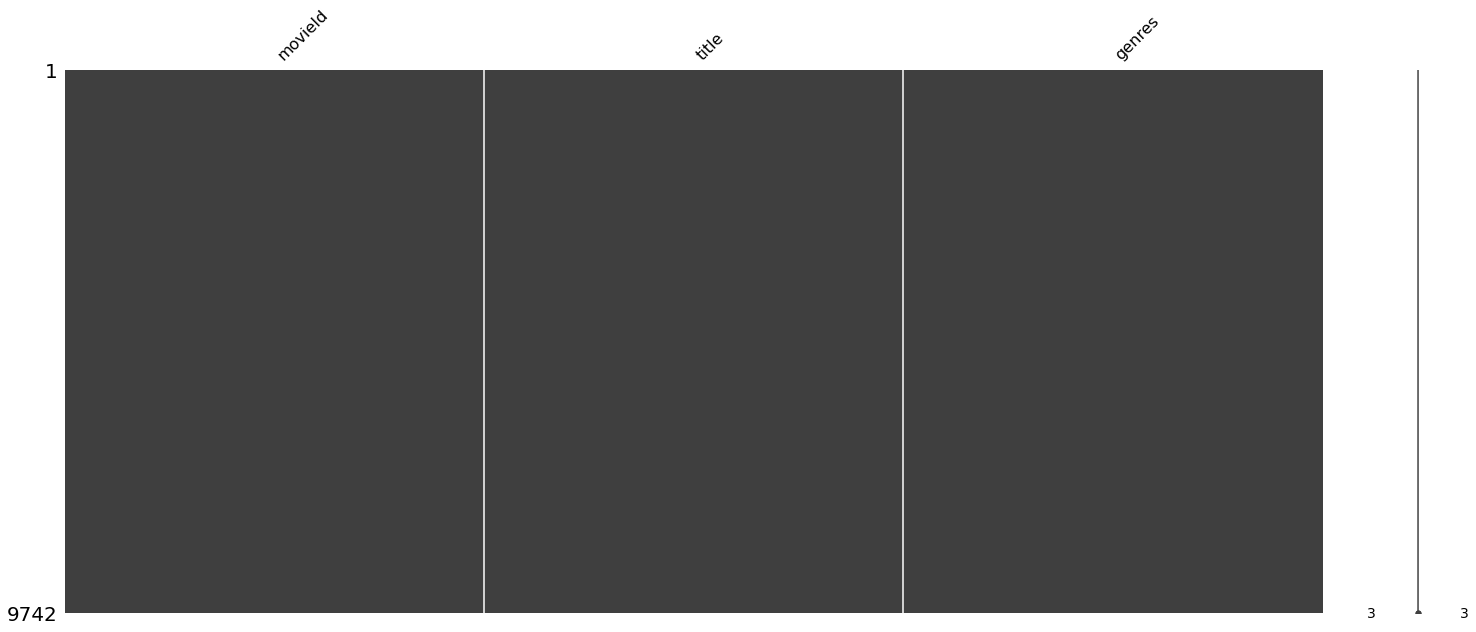

In [29]:
import missingno as msno
msno.matrix(movie_names)

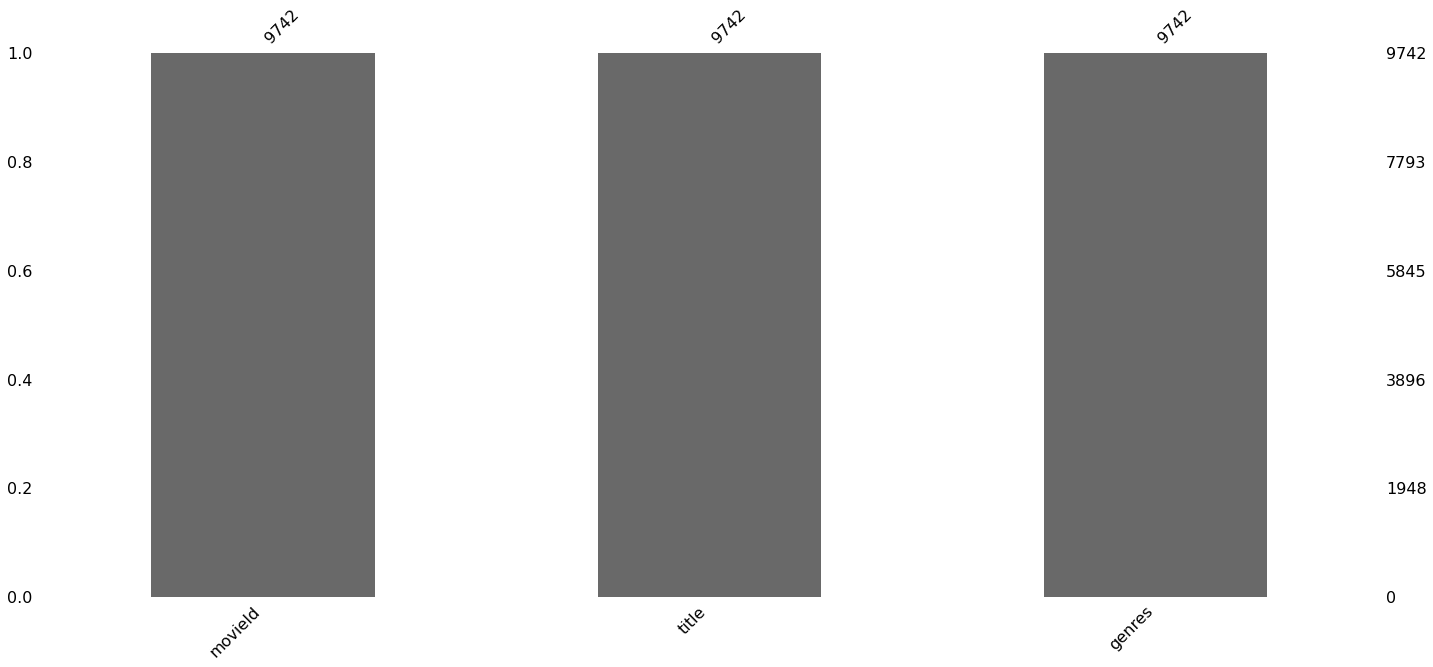

In [30]:
msno.bar(movie_names)

In [31]:
links_data.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

- movieId: It's serial number for movie
- imdbId: Movie id given on IMDb platform
- tmdbId: Movie id given on TMDb platform

In [32]:
links_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [33]:
#We specify the parantheses so we don't conflict with movies that have years in their titles
movie_names['year'] = movie_names.title.str.extract('(\(\d\d\d\d\))',expand=False)
##Removing the parentheses
movie_names['year'] = movie_names.year.str.extract('(\d\d\d\d)',expand=False)
###Removing the years from the 'title' column
movie_names['title'] = movie_names.title.str.replace('(\(\d\d\d\d\))', '')
##Applying the strip function to get rid of any ending whitespace characters that may have appeared
movie_names['title'] = movie_names['title'].apply(lambda x: x.strip())
movie_names.shape

(9742, 4)

In [34]:
movie_names.genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

In [35]:
movie_names['genres'] = movie_names.genres.str.split('|')
movie_names.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


## **Build recommendation system**

**Popularity based Recommendation System**

**Approach:**

The Simple Recommender offers generalized recommendations to every user based on movie popularity and (sometimes) genre.

The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.



 Top review websites like IMDb and Rotten Tomatoes maintain a database of movies and their popularity in terms of reviews and ratings. Utilising this data to recommend the most popular movies to users based on their star ratings, could increase their content consumption.

The popularity-based recommendation system eliminates the need for knowing other factors like user browsing history, user preferences, the star cast of the movie, genre, and other factors. Hence, the single-most factor considered is the star rating

What we are actually doing:

The implementation of this model is extremely trivial.
All we have to do is sort our movies based on ratings and popularity and display the top movies of our list.
As an added step, we can pass in a genre argument to get the top movies of a particular genre.

Merging ratings_data and movie_names data on *movieId*

In [36]:
#movie_data is the new DataFrame for the merged data 
movie_data=pd.merge(ratings_data,movie_names,on='movieId')
movie_data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,5,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,7,1,4.5,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
3,15,1,2.5,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
4,17,1,4.5,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995


Now we are checking how many viewers have reviewed for a particular movie

In [37]:
#Creating a dataframe for analysis
#We are grouping on the title name and rating of the particular movie
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['Total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend

,rating,Total number of ratings
title,,
'71,4.000000,1
'Hellboy': The Seeds of Creation,4.000000,1
'Round Midnight,3.500000,2
'Salem's Lot,5.000000,1
'Til There Was You,4.000000,2
...,...,...
eXistenZ,3.863636,22
xXx,2.770833,24
xXx: State of the Union,2.000000,5


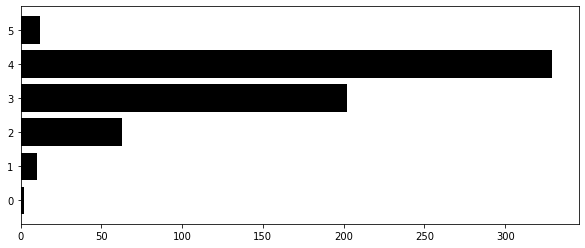

In [38]:
#Visualizing the trend 
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['Total number of ratings'],color="black")
plt.show()

- *We can observe that more than 300 movies were reviewed a rating of 4 on a scale of 0-5*

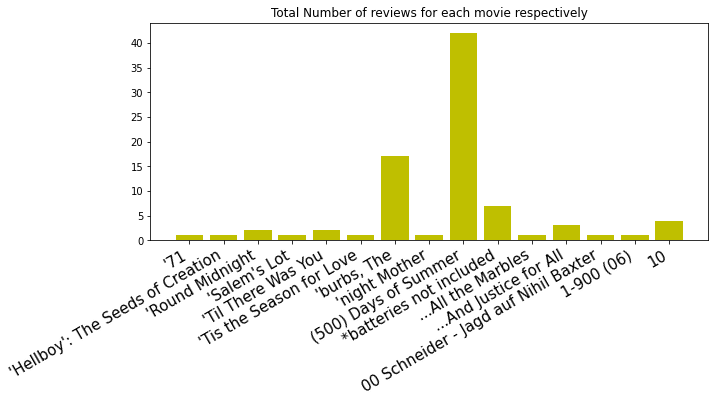

In [39]:
#Bar graph describing the  number of reviews for first 15 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(15).index,trend['Total number of ratings'].head(15),color='y')
ax.set_xticklabels(trend.index,rotation=30,fontsize='15',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie respectively")
plt.show()

- *We can observe from the bar graph that among first 15 movies (500)Days of Summer has highest number of reviews*

Checking the Popularity

In [40]:
# Calculate mean rating of all movies and check the popular high rating movies
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Sorority House Massacre                           5.0
Entertaining Angels: The Dorothy Day Story        5.0
Passenger, The (Professione: reporter)            5.0
Little Dieter Needs to Fly                        5.0
Human Condition III, The (Ningen no joken III)    5.0
                                                 ... 
Wizards of the Lost Kingdom II                    0.5
Reptilicus                                        0.5
Brothers Solomon, The                             0.5
Giant Spider Invasion, The                        0.5
Anaconda: The Offspring                           0.5
Name: rating, Length: 9446, dtype: float64

- *Therefore, the Recommender System based on Popularity of the movie is observed*

## Colaborative Filtering  based Recommendation system

Collaborative filtering (CF) is a technique used by recommender systems.<br><br>
Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.<br>
There are two types of collaborative filtering, namely:
<br>
- User – User collaborative filtering
<br>
- Item – Item collaborative filtering

One stating feature of this Recommendation System is that it does'nt care what the movie is (or what it contains). It works purely on the basis of assigned movie Id and tries to predict ratings based on how the other users have perceive the movie.

- Instead of implementing CF from scratch, we can use the *Surprise library* that is used for extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.

pip install surprise

Surprise- Simple Python Recommmendation System Engine

In [41]:
# Surprise reader API to read the dataset
reader = Reader()

        We use ratings_data for this approach 

In [42]:
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']],reader)

It is used load the data from the file or dataframe

In [43]:
trainset= data.build_full_trainset()

This will build a trainset object

Now, we use SVD algorithm

In [44]:
#Instantiating SVD Class
svd = SVD()
#Fitting the trainset data
svd.fit(trainset)

In [45]:
#Estimating the model
svd.estimate(1, 105)

4.076104651358692

Therefore,we got the above result.
